In [1]:
# 加载相关库函数
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") #用于排除警告
from sklearn.decomposition import PCA #主成分降维
from sklearn.preprocessing import StandardScaler #数据标准化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y, y_pred, cmap=plt.cm.Blues, title='混淆矩阵'):
    """
    绘制混淆矩阵
    :param y: 真实值
    :param y_pred: 预测值
    :param cmap: 热力图的颜色
    :param title: 图像标题
    :return:
    """
    cm = confusion_matrix(y, y_pred)
    classes = list(set(y))
    classes.sort()
    plt.imshow(cm, cmap)
    indices = range(len(cm))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    # 热度表
    plt.colorbar()
    # 坐标轴含义
    plt.xlabel('guess')
    plt.ylabel('fact')
    plt.title(title)
    # 显示数据的值（Numbers）
    for first_index in range(len(cm)):
        for second_index in range(len(cm[first_index])):
            plt.text(first_index, second_index, cm[first_index][second_index])

### 设计一个 SVM 程序，对 wine 数据集进行分类（二分类或三分类即可）。（√）
## 算法流程：
### （1）读取鸢尾花数据集； （√）
### （2）提取前两个特征来构建样本集； （√）
### （3）使用 SVM 算法求取决策平面； （√）
### （4）测试分类效果并将数据及分类结果进行可视化；（√）
## 加分项：
### （1） 复现 SVM 算法（√）
### （2） 实现 SVR 支持向量回归（√）
### （3） 有大量的数据预处理方式（√）

# （一）设计一个 SVM 程序，对 wine 数据集进行分类（二分类或三分类即可）。

## 加载数据集

In [3]:
"""
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline 
"""

'\n1) Alcohol\n2) Malic acid\n3) Ash\n4) Alcalinity of ash  \n5) Magnesium\n6) Total phenols\n7) Flavanoids\n8) Nonflavanoid phenols\n9) Proanthocyanins\n10)Color intensity\n11)Hue\n12)OD280/OD315 of diluted wines\n13)Proline \n'

In [4]:
# 1获取数据
name=['class','Alcohol','Malic acid','Ash'
      ,'Alcalinity of ash','Magnesium','Total phenols','Flavanoids'
      ,'Nonflavanoid phenols',' Proanthocyanins','Color intensity','Hue',
      'OD280/OD315 of diluted wines','Proline']
print(name)
df = pd.read_csv("./data/wine.data",header=None,names=name)
display(df)
data=df

['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', ' Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 数据预处理

### 数据可视化

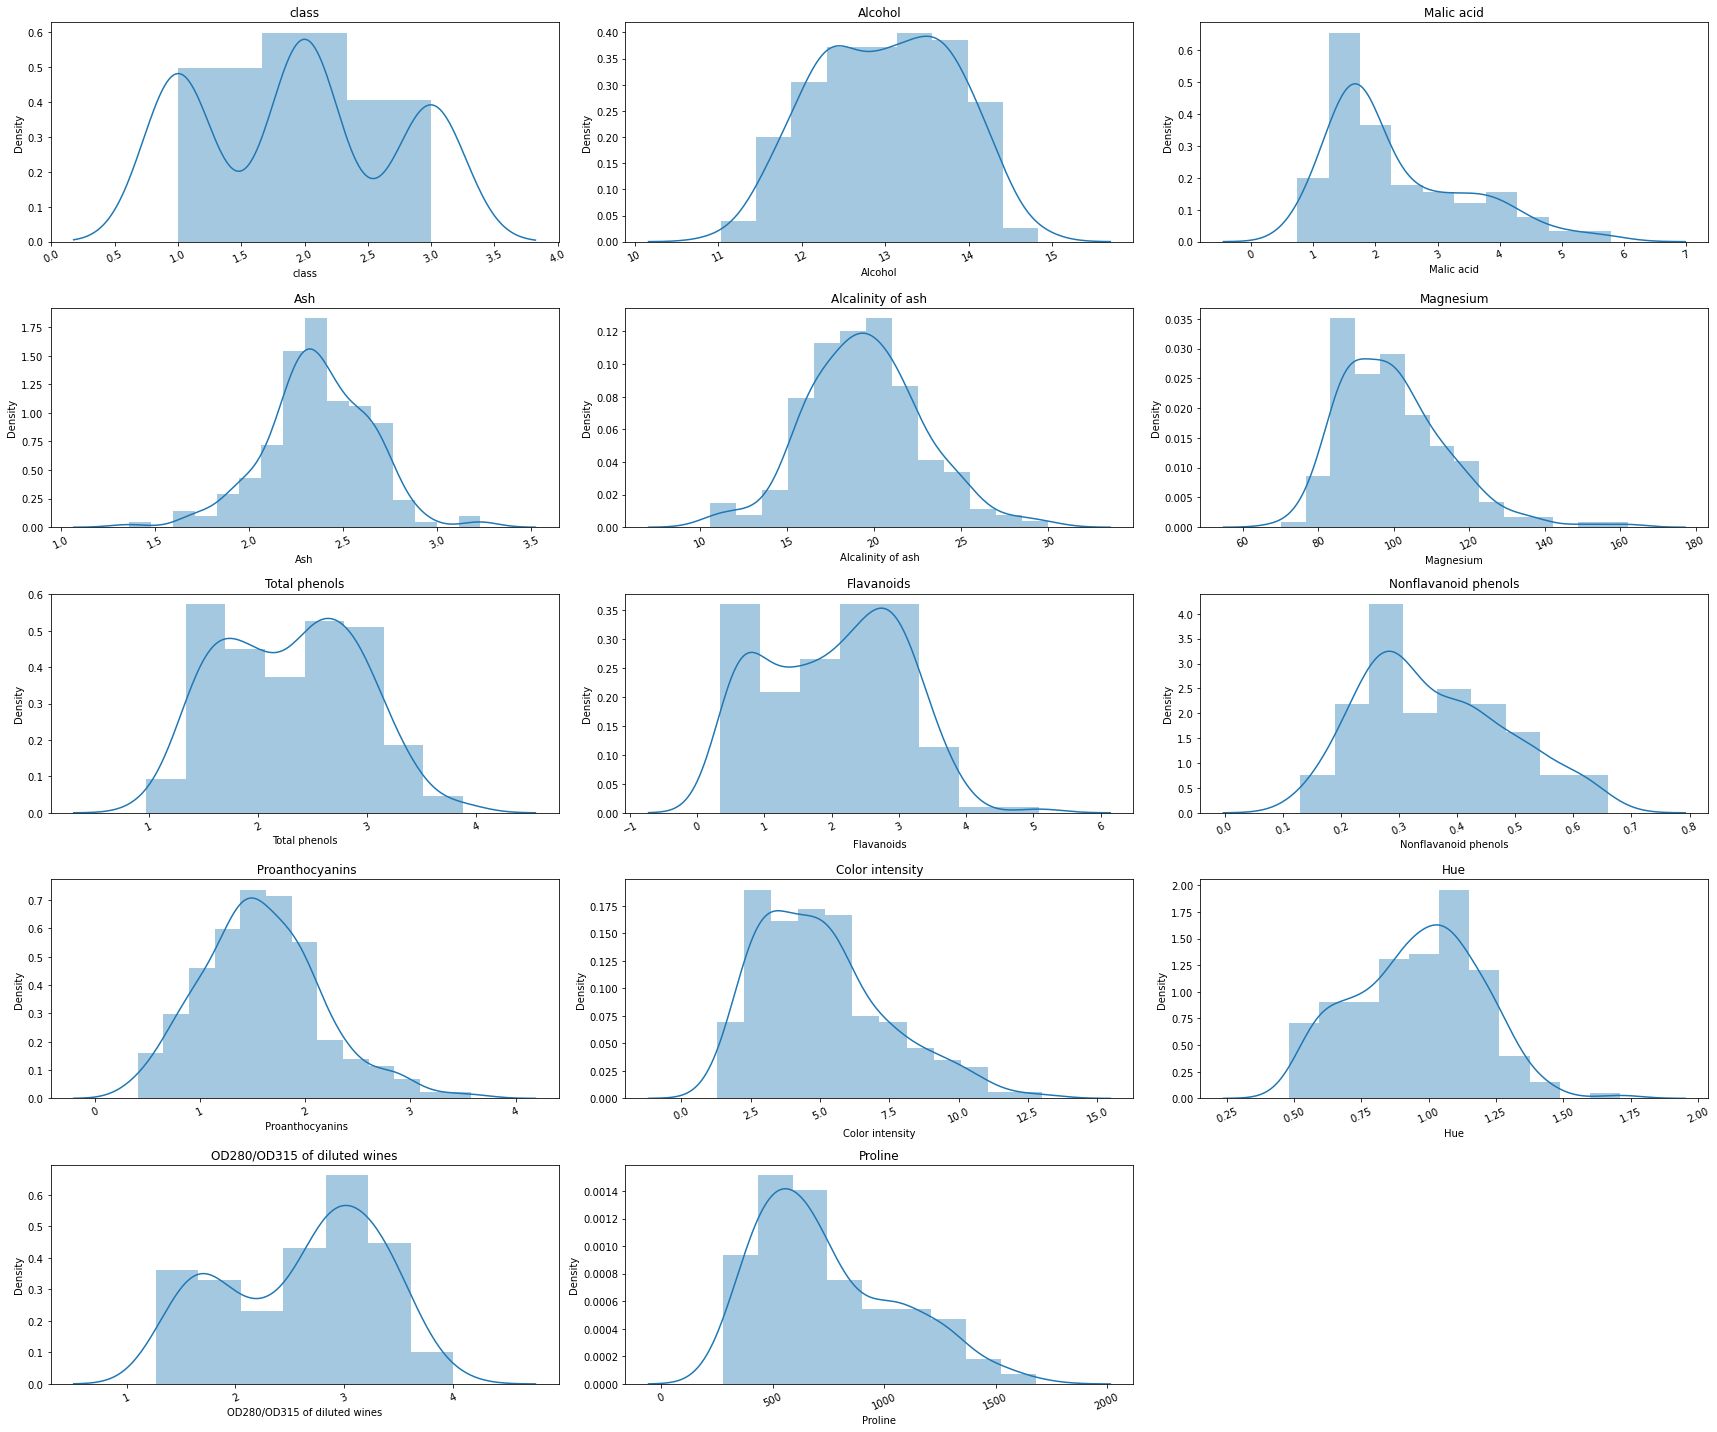

In [5]:
# 2进行数据可视化，分析各个特征
import math
def plot_distribution(dataset, cols, width, height, hspace, wspace):
    fig = plt.figure(figsize = (width, height))
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    rows = math.ceil(dataset.shape[1] / cols)
    for i,column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels = substrings)
            plt.xticks(rotation = 25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation = 25)
    plt.tight_layout()
plot_distribution(data, cols=3, width=24, height=20, hspace=0.2, wspace=0.5)

### 关联度分析

class                           1.000000
Alcalinity of ash               0.517859
Nonflavanoid phenols            0.489109
Malic acid                      0.437776
Color intensity                 0.265668
Ash                            -0.049643
Magnesium                      -0.209179
Alcohol                        -0.328222
 Proanthocyanins               -0.499130
Hue                            -0.617369
Proline                        -0.633717
Total phenols                  -0.719163
OD280/OD315 of diluted wines   -0.788230
Flavanoids                     -0.847498
Name: class, dtype: float64


<Figure size 1152x576 with 0 Axes>

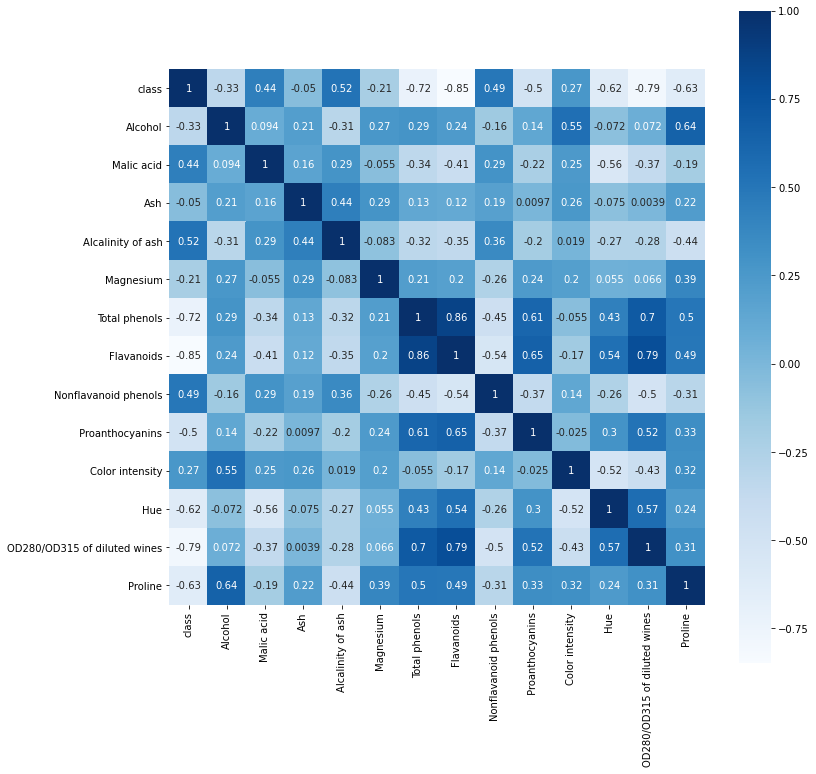

In [6]:
plt.figure(figsize=(16,8), facecolor='w')

corr_matrix = data.corr()
print(corr_matrix['class'].sort_values(ascending=False))
# 展示各特征之间的相关性
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()

### 标准化和PCA降维

In [7]:
X=data.iloc[:,1:]
y=data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=6)

In [8]:
#标准差标准化（规则）
stdScaler = StandardScaler().fit(X_train)
X_std_train = stdScaler.transform(X_train)
X_std_test = stdScaler.transform(X_test)
#pca降维
pca_model = PCA(n_components=2).fit(X_std_train)#规则
X_pca_train = pca_model.transform(X_std_train)
X_pca_test = pca_model.transform(X_std_test)
print(X_pca_test)

[[ 2.58883264 -1.18912401]
 [ 0.93232138  2.55808095]
 [-1.99223885  1.47686495]
 [-0.48675231  1.93595108]
 [ 2.14906969 -0.98968015]
 [ 1.76337113 -0.58134818]
 [ 0.69836296  2.34064543]
 [ 0.92503654  2.25995727]
 [-1.43245806  2.05065759]
 [ 2.46064817 -1.11433476]
 [ 2.19631771 -0.99111988]
 [-0.44040698  0.33185386]
 [-3.26515526 -2.285215  ]
 [ 1.09088592 -0.85915246]
 [ 0.71807661  2.32231523]
 [ 2.28122299 -1.86939732]
 [ 2.58070865 -0.97963499]
 [ 1.45496434  0.76203781]
 [-2.11843381 -2.3771089 ]
 [ 1.33545534  2.11863789]
 [-2.85523842 -1.59556946]
 [-2.38145842 -2.05896766]
 [ 3.41932851 -1.11352255]
 [ 3.37130756 -1.42211992]
 [-1.89495748  0.70922638]
 [-1.60143179  1.79731052]
 [ 2.61195188 -0.34361099]
 [-3.85416069 -0.76621259]
 [-2.25165429 -0.3812399 ]
 [ 1.0021275   1.48363716]
 [ 1.9456713  -0.11607485]
 [-2.92165125 -0.53082083]
 [-2.79944725 -0.66173921]
 [-1.15552315  1.77536925]
 [ 3.09754522 -2.10231688]
 [-2.79849437 -1.9708124 ]]


### SVM分类(有PCA+std）

In [9]:
from sklearn import svm
print(X_pca_train)
print(X_pca_test)

[[-1.09955780e+00  6.64941519e-01]
 [-1.48659363e+00 -2.42668855e+00]
 [ 2.76266944e+00 -1.73345333e+00]
 [-2.31733207e+00 -3.56713785e-01]
 [ 2.89254031e+00 -6.63011370e-01]
 [-1.10504061e+00  2.96494996e+00]
 [-2.30681914e+00 -4.00009823e-01]
 [-5.71366280e-01  2.37021943e+00]
 [-2.33806467e+00 -5.40312007e-01]
 [ 1.13642437e+00 -8.90552893e-02]
 [ 1.22077261e+00  9.91001029e-02]
 [-6.63739871e-01  1.83470272e+00]
 [ 3.03057576e-02  1.30448587e+00]
 [-6.21383254e-01  2.67480228e+00]
 [ 1.63883755e+00  5.82685686e-01]
 [ 3.53204331e+00 -1.56144682e+00]
 [-7.03133289e-01  1.09782439e+00]
 [ 8.32566558e-01  1.53211675e+00]
 [ 1.61376496e+00 -8.35152009e-02]
 [ 3.60500776e+00 -2.47894839e+00]
 [-1.31696639e+00  7.01337709e-01]
 [ 1.70279291e+00  1.06524939e+00]
 [-2.47949510e+00 -1.82223786e+00]
 [ 1.22314143e+00 -1.73548990e+00]
 [ 2.11509225e+00 -6.26225980e-01]
 [-7.40363233e-01  2.62707421e+00]
 [ 2.28294605e+00 -2.31067012e+00]
 [-2.49415811e+00  1.21132925e+00]
 [ 2.61126780e+00 -1

In [10]:
model0=svm.SVC(kernel='linear',C=1)

In [11]:
model0_fit=model0.fit(X_pca_train,y_train)

In [12]:
wine_target_pred0 = model0_fit.predict(X_pca_test)

In [13]:
from sklearn.metrics import classification_report
print('使用SVM预测iris数据的分类报告为：','\n',
      classification_report(y_test,
            wine_target_pred0))

使用SVM预测iris数据的分类报告为： 
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [14]:
from sklearn.metrics import accuracy_score
## 计算模型的准确率/精度
print ('训练集准确率：', accuracy_score(y_train, model0_fit.predict(X_pca_train)))
print ('测试集准确率：', accuracy_score(y_test, model0_fit.predict(X_pca_test)))

训练集准确率： 0.9788732394366197
测试集准确率： 0.9444444444444444


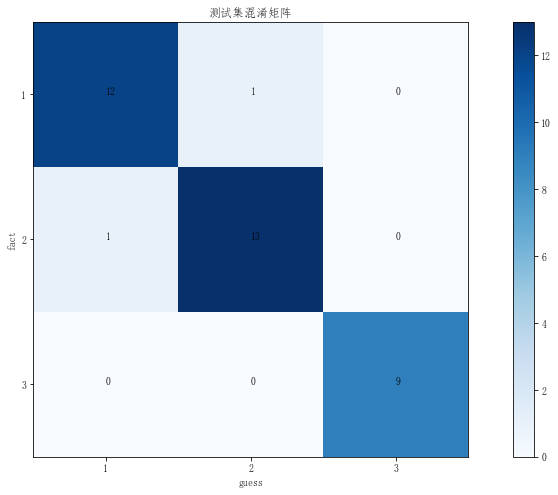

In [15]:
# 输出混淆矩阵
plt.figure(figsize=(16,8), facecolor='w')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plot_confusion_matrix(y_test,
                          wine_target_pred0,
                          title='测试集混淆矩阵')
plt.show()

### SVM分类(没PCA)

In [16]:
from sklearn import svm

In [17]:
print(X_train)
print(y_train)

     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
122    12.42        4.43  2.73               26.5        102           2.20   
159    13.48        1.67  2.64               22.5         89           2.60   
49     13.94        1.73  2.27               17.4        108           2.88   
139    12.84        2.96  2.61               24.0        101           2.32   
51     13.83        1.65  2.60               17.2         94           2.45   
..       ...         ...   ...                ...        ...            ...   
176    13.17        2.59  2.37               20.0        120           1.65   
79     12.70        3.87  2.40               23.0        101           2.83   
109    11.61        1.35  2.70               20.0         94           2.74   
106    12.25        1.73  2.12               19.0         80           1.65   
138    13.49        3.59  2.19               19.5         88           1.62   

     Flavanoids  Nonflavanoid phenols   Proanthocya

In [18]:
model1=svm.SVC(kernel='linear',C=1)

In [19]:
X_train.iloc[:,:2]

,Alcohol,Malic acid
122,12.42,4.43
159,13.48,1.67
49,13.94,1.73
139,12.84,2.96
51,13.83,1.65
...,...,...
176,13.17,2.59
79,12.70,3.87
109,11.61,1.35
106,12.25,1.73


In [20]:
X=data.iloc[:,1:3]
y=data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=6)

In [21]:
model1_fit=model1.fit(X_train,y_train)

In [22]:
wine_target_pred = model1_fit.predict(X_test)

In [23]:
print('预测前10个结果为：\n',wine_target_pred[:10])


预测前10个结果为：
 [1 2 2 2 3 1 2 2 2 1]


In [24]:
from sklearn.metrics import classification_report
print('使用SVM预测iris数据的分类报告为：','\n',
      classification_report(y_test,
            wine_target_pred))

使用SVM预测iris数据的分类报告为： 
               precision    recall  f1-score   support

           1       0.91      0.77      0.83        13
           2       1.00      1.00      1.00        14
           3       0.73      0.89      0.80         9

    accuracy                           0.89        36
   macro avg       0.88      0.89      0.88        36
weighted avg       0.90      0.89      0.89        36



In [25]:
from sklearn.metrics import accuracy_score
## 计算模型的准确率/精度
print ('训练集准确率：', accuracy_score(y_train, model1_fit.predict(X_train)))
print ('测试集准确率：', accuracy_score(y_test, model1_fit.predict(X_test)))

训练集准确率： 0.7887323943661971
测试集准确率： 0.8888888888888888


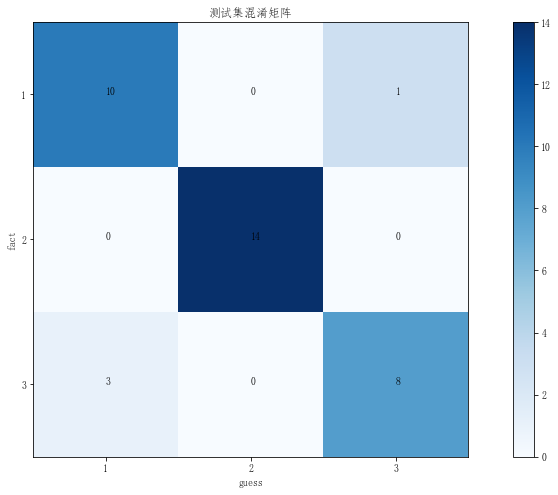

In [26]:
# 输出混淆矩阵
plt.figure(figsize=(16,8), facecolor='w')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plot_confusion_matrix(y_test,
                          wine_target_pred,
                          title='测试集混淆矩阵')
plt.show()

### 结果可视化

In [27]:
import matplotlib as mpl


In [28]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

<Figure size 1152x576 with 0 Axes>

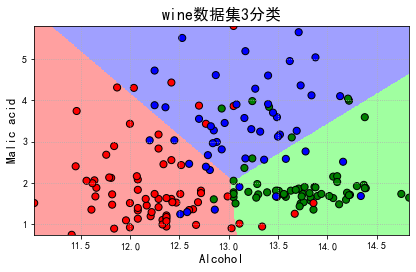

In [29]:
# 画图
plt.figure(figsize=(16,8), facecolor='w')

N = 500
x1_min, x2_min = X.min()
x1_max, x2_max = X.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


grid_hat = model1_fit.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## lable列表
plt.xlabel(name[1], fontsize=13)
plt.ylabel(name[2], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'wine数据集3分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

# （二）使用IRIS数据集完成剩余内容
## 算法流程：
### （1）读取鸢尾花数据集； 
### （2）提取前两个特征来构建样本集； 
### （3）使用 SVM 算法求取决策平面； 
### （4）测试分类效果并将数据及分类结果进行可视化；
## 复现，SVR

## ①上述算法流程

### 读取数据集；

In [30]:
name_iris=['SepalLength','SepalWidth','Petal.Length','Petal.Width','class']
print(name_iris)
df_iris = pd.read_csv("./data/iris.data",header=None,names=name_iris)
display(df_iris)
data_iris=df_iris

['SepalLength', 'SepalWidth', 'Petal.Length', 'Petal.Width', 'class']


,SepalLength,SepalWidth,Petal.Length,Petal.Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
data_iris.loc[data_iris['class']=='Iris-setosa','class'] = 1
data_iris.loc[data_iris['class']=='Iris-versicolor','class'] = 2
data_iris.loc[data_iris['class']=='Iris-virginica','class'] = 3
display(df_iris)

,SepalLength,SepalWidth,Petal.Length,Petal.Width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


### 提取前两个特征来构建样本集； 

In [32]:
X=data_iris.iloc[:,0:2]
y=data_iris['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=6)

In [33]:
X_train

,SepalLength,SepalWidth
12,4.8,3.0
52,6.9,3.1
27,5.2,3.5
34,4.9,3.1
54,6.5,2.8
...,...,...
148,6.2,3.4
79,5.7,2.6
109,7.2,3.6
106,4.9,2.5


In [34]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

### 使用 SVM 算法求取决策平面；

In [35]:
from sklearn.svm import SVC
import time

In [36]:
### 不同核函数比较
## 数据SVM分类器构建
svm1 = SVC(C=1, kernel='linear')
svm2 = SVC(C=1, kernel='rbf')
svm3 = SVC(C=1, kernel='poly')

## 模型训练
t0=time.time()
svm1.fit(X_train, y_train)
t1=time.time()
svm2.fit(X_train, y_train)
t2=time.time()
svm3.fit(X_train, y_train)
t3=time.time()


### 测试分类效果并将数据及分类结果进行可视化

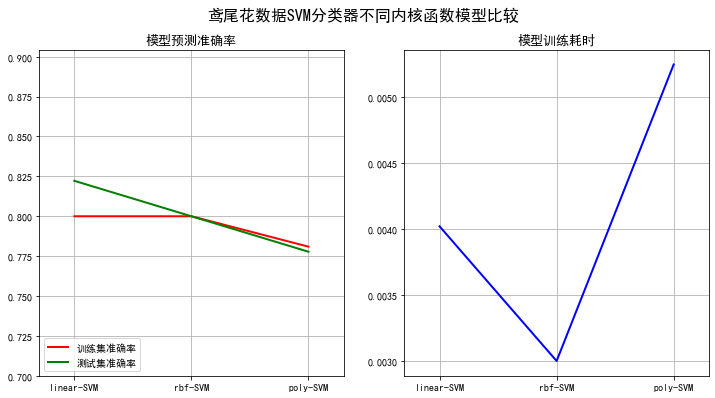

In [37]:
### 效果评估
svm1_score1 = accuracy_score(y_train, svm1.predict(X_train))
svm1_score2 = accuracy_score(y_test, svm1.predict(X_test))

svm2_score1 = accuracy_score(y_train, svm2.predict(X_train))
svm2_score2 = accuracy_score(y_test, svm2.predict(X_test))

svm3_score1 = accuracy_score(y_train, svm3.predict(X_train))
svm3_score2 = accuracy_score(y_test, svm3.predict(X_test))



## 画图
x_tmp = [0,1,2]
t_score = [t1 - t0, t2-t1, t3-t2]
y_score1 = [svm1_score1, svm2_score1, svm3_score1]
y_score2 = [svm1_score2, svm2_score2, svm3_score2]

plt.figure(facecolor='w', figsize=(12,6))


plt.subplot(121)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')
plt.xlim(-0.3, 2.3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower left')
plt.title(u'模型预测准确率', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'模型训练时间')
plt.title(u'模型训练耗时', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM'], rotation=0)
plt.xlim(-0.3, 2.3)
plt.grid(b=True)

plt.suptitle(u'鸢尾花数据SVM分类器不同内核函数模型比较', fontsize=16)

plt.show()

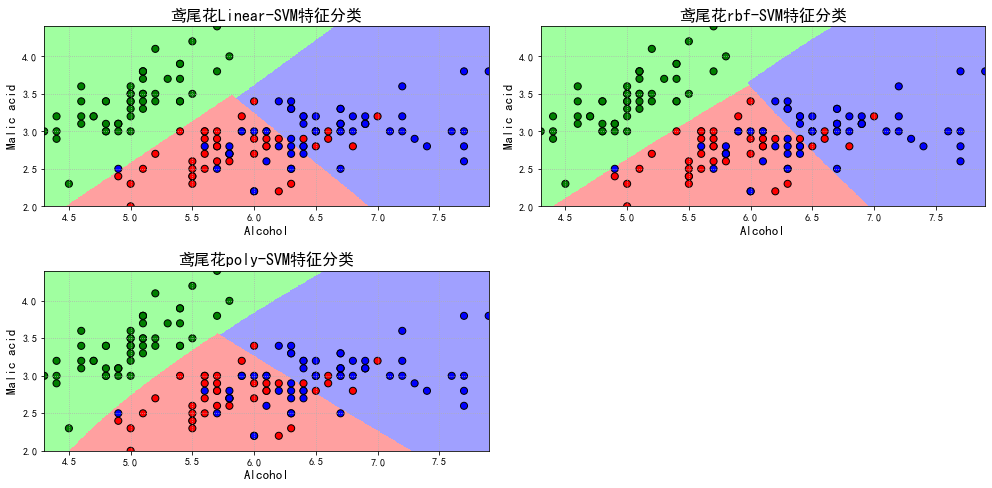

In [38]:
### 预测结果画图
### 画图比较
N = 500
x1_min, x2_min = X.min()
x1_max, x2_max = X.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm1_grid_hat = svm1.predict(grid_show)
svm1_grid_hat = svm1_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm2_grid_hat = svm2.predict(grid_show)
svm2_grid_hat = svm2_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm3_grid_hat = svm3.predict(grid_show)
svm3_grid_hat = svm3_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同


## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(221)
## 区域图
plt.pcolormesh(x1, x2, svm1_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## lable列表
plt.xlabel(name[1], fontsize=13)
plt.ylabel(name[2], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花Linear-SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, svm2_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## lable列表
plt.xlabel(name[1], fontsize=13)
plt.ylabel(name[2], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花rbf-SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, svm3_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## lable列表
plt.xlabel(name[1], fontsize=13)
plt.ylabel(name[2], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花poly-SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.show()



## ②使用SVR回归测试

In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法


In [40]:
model = SVR()

In [41]:
output=model.fit(X_train, y_train).predict(X_test) # 将回归训练中得到的预测y存入列表

In [42]:
output

array([0.88453183, 2.64629653, 0.98039909, 1.12091055, 2.570366  ,
       1.92142081, 2.43553572, 1.05742519, 2.52061631, 2.07135949,
       2.27198678, 2.02396165, 2.47652049, 3.04458577, 2.59472924,
       2.45372084, 3.05845211, 2.47652049, 2.17709307, 0.80220797,
       1.13222651, 2.87580696, 0.84702784, 0.99766661, 1.98075608,
       2.61132285, 2.62976639, 3.00344265, 1.08316186, 1.73687736,
       1.15039059, 1.61064346, 1.01497773, 1.02424375, 2.54157092,
       2.62400829, 1.82364726, 2.61132285, 1.85941391, 1.05704296,
       0.99766661, 2.50747823, 2.36316794, 2.06586917, 0.84702784])

In [43]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
mean_squared_error(y_test,output)
mean_absolute_error(y_test,output)
r2_score(y_test,output)

0.8434054484758216

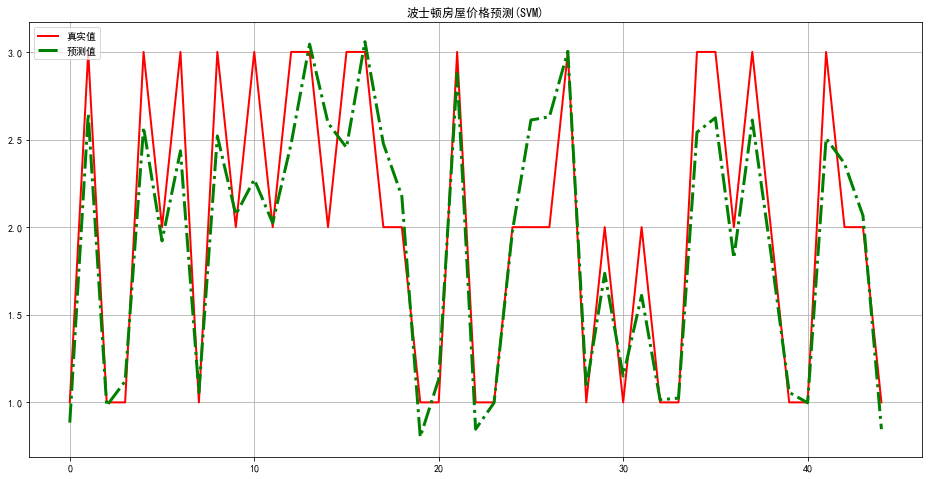

In [44]:
## 画图
colors = ['g-', 'b-']
ln_x_test = range(len(X_test))
y_predict = model.predict(X_test)

plt.figure(figsize=(16,8), facecolor='w')
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
plt.plot(ln_x_test, y_predict, 'g-.', lw = 3,label=u'预测值')

# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测(SVM)")

plt.show()


## ③复现